# 4.3. Concise Implementation of Multilayer Perceptrons


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## 4.3.1. Model

In [2]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

RuntimeError: grad can be implicitly created only for scalar outputs

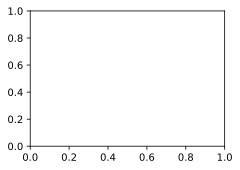

In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.3.2. Summary

Using high-level APIs, we can implement MLPs much more concisely.

For the same classification problem, the implementation of an MLP is the same as that of softmax regression except for additional hidden layers with activation functions.